# Classificação de Imagens com o Dataset MNIST:

Nesta seção faremos o "Hello World" do aprendizado de máquina profundo: treinar um modelo de aprendizado  para classificar corretamente dígitos escritos à mão.

## Objetivos

* Entenda como o aprendizado profundo pode resolver problemas que os métodos de programação tradicionais não conseguem
* Saiba mais sobre o [conjunto de dados de dígitos manuscritos MNIST](http://yann.lecun.com/exdb/mnist/)
* Use a [API Keras](https://keras.io/) para carregar o conjunto de dados MNIST e prepará-lo para treinamento
* Crie uma rede neural simples para realizar classificação de imagens
* Treine a rede neural usando o conjunto de dados MNIST preparado
* Observe o desempenho da rede neural treinada

## O Problema: Classificação de Imagens

Na programação tradicional, o programador é capaz de articular regras e condições em seu código que seu programa pode então usar para agir da maneira correta. Essa abordagem continua a funcionar excepcionalmente bem para uma grande variedade de problemas.

A classificação de imagens, que pede a um programa para classificar corretamente uma imagem que nunca viu antes em sua classe correta, é quase impossível de ser resolvida com técnicas de programação tradicionais. Como poderia um programador definir as regras e condições para classificar corretamente uma enorme variedade de imagens, especialmente tendo em conta imagens que nunca viu?

## A solução: Deep Learning

O aprendizado profundo é excelente no reconhecimento de padrões por tentativa e erro. Ao treinar uma rede neural profunda com dados suficientes e fornecer à rede feedback sobre seu desempenho por meio de treinamento, a rede pode identificar, através de uma enorme quantidade de iterações, seu próprio conjunto de condições pelas quais ela pode agir da maneira correta.

## O Dataset MNIST

Na história do aprendizado profundo, a classificação precisa de imagens do [conjunto de dados MNIST](http://yann.lecun.com/exdb/mnist/), uma coleção de 70.000 imagens em tons de cinza de dígitos manuscritos de 0 a 9, foi uma tarefa difícil. grande desenvolvimento. Embora hoje o problema seja considerado trivial, fazer classificação de imagens com MNIST tornou-se uma espécie de “Olá Mundo” para aprendizagem profunda.

Aqui estão 40 das imagens incluídas no Dataset MNIST:

![picture](https://drive.google.com/uc?id=1PzAr3emcnpuV6kkXXUshpMWkEnOtvW0D)

## Treinando e Validando Dados e Rótulos

Ao trabalhar com imagens para aprendizado profundo, precisamos das próprias imagens, geralmente denotadas como `X`, e também dos [rótulos](https://developers.google.com/machine-learning/glossary#label) corretos para elas. imagens, geralmente denotadas como `Y`. Além disso, precisamos de valores `X` e `Y` para *treinar* o modelo e, em seguida, um conjunto separado de valores `X` e `Y` para *validar* o desempenho do modelo após ele ter sido treinado. Portanto, precisamos de 4 segmentos de dados para o conjunto de dados MNIST:

1. `x_train`: Imagens usadas para treinar a rede neural
2. `y_train`: rótulos corretos para as imagens `x_train`, usados para avaliar as previsões do modelo durante o treinamento
3. `x_valid`: Imagens reservadas para validação do desempenho do modelo após seu treinamento
4. `y_valid`: rótulos corretos para as imagens `x_valid`, usados para avaliar as previsões do modelo após ele ter sido treinado

O processo de preparação de dados para análise é denominado [Engenharia de Dados](https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7). Para saber mais sobre as diferenças entre dados de treinamento e dados de validação (bem como dados de teste), confira [este artigo](https://machinelearningmastery.com/difference-test-validation-datasets/) de Jason Brownlee.

## Carregando os dados na memória (with Keras)

Existem muitas [estruturas de aprendizagem profunda](https://developer.nvidia.com/deep-learning-frameworks), cada uma com seus próprios méritos. Neste workshop trabalharemos com [Tensorflow 2](https://www.tensorflow.org/tutorials/quickstart/beginner) e especificamente com a [API Keras](https://keras.io/). Keras tem muitas funções úteis integradas projetadas para tarefas de visão computacional. É também uma escolha legítima para aprendizagem profunda em um ambiente profissional devido à sua [legibilidade](https://blog.pragmaticengineer.com/readable-code/) e eficiência, embora não esteja sozinho nesse aspecto, e é vale a pena investigar uma variedade de estruturas ao iniciar um projeto de aprendizagem profunda.

Um dos muitos recursos úteis que Keras oferece são módulos contendo muitos métodos auxiliares para [muitos conjuntos de dados comuns](https://www.tensorflow.org/api_docs/python/tf/keras/datasets), incluindo MNIST.

Começaremos carregando o módulo do conjunto de dados Keras para MNIST:

In [4]:
from tensorflow.keras.datasets import mnist

Com o módulo `mnist`, podemos carregar facilmente os dados MNIST, já particionados em imagens e rótulos para treinamento e validação:

In [5]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

## Explorando a base de dados MNIST:

Afirmamos acima que o conjunto de dados MNIST continha 70.000 imagens em tons de cinza de dígitos manuscritos. Ao executar as células a seguir, podemos ver que Keras particionou 60.000 dessas imagens para treinamento e 10.000 para validação (após o treinamento), e também que cada imagem em si é um array 2D com dimensões 28x28:

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_valid.shape

(10000, 28, 28)

Além disso, podemos ver que essas imagens 28x28 são representadas como uma coleção de valores inteiros de 8 bits sem sinal entre 0 e 255, os valores correspondentes ao valor da escala de cinza de um pixel onde `0` é preto, `255` é branco e todos os outros os valores estão entre:

In [8]:
x_train.dtype

dtype('uint8')

In [9]:
x_train.min()

0

In [10]:
x_train.max()

255

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Usando [Matplotlib](https://matplotlib.org/), podemos renderizar uma destas imagens em tons de cinza em nosso conjunto de dados:

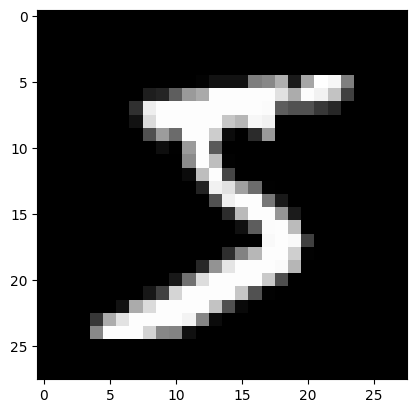

In [12]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

Desta forma podemos ver agora que esta é uma imagem de 28x28 pixels de um 5. Ou é um 3? A resposta está nos dados `y_train`, que contém rótulos corretos para os dados. Vamos dar uma olhada:

In [13]:
y_train[0]

5

## Preparando os dados para treino

No deep learning, é comum que os dados precisem ser transformados para ficarem no estado ideal para treinamento. Para este problema específico de classificação de imagens, existem 3 tarefas que devemos realizar com os dados na preparação para o treinamento:
1. Achate os dados da imagem para simplificar a entrada da imagem no modelo
2. Normalize os dados da imagem, para facilitar o trabalho com os valores de entrada da imagem para o modelo
3. Categorize os rótulos, para facilitar o trabalho com os valores dos rótulos para o modelo

### (Flattening )Achatando os dados da imagem

Embora seja possível para um modelo de aprendizagem profunda aceitar uma imagem bidimensional (no nosso caso 28x28 pixels), vamos simplificar as coisas para começar e [remodelar](https://www.tensorflow.org/api_docs/python /tf/reshape) cada imagem em uma única matriz de 784 pixels contínuos (nota: 28x28 = 784). Isso também é chamado de achatamento da imagem.

Aqui fazemos isso usando o método auxiliar `reshape`:

In [14]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

Podemos confirmar que os dados da imagem foram remodelados e agora são uma coleção de matrizes 1D contendo valores de 784 pixels cada:

In [15]:
x_train.shape

(60000, 784)

In [16]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizando (scaling) os dados das imagens

Os modelos de aprendizagem profunda são melhores para lidar com números de ponto flutuante entre 0 e 1 (mais sobre este tópico posteriormente). A conversão de valores inteiros em valores de ponto flutuante entre 0 e 1 é chamada de [normalização](https://developers.google.com/machine-learning/glossary#normalization). Uma abordagem simples que adotaremos aqui para normalizar os dados será para dividir todos os valores de pixel (que, se você se lembra, estão entre 0 e 255) por 255:

In [17]:
x_train = x_train / 255
x_valid = x_valid / 255

Agora podemos ver que os valores são todos valores de ponto flutuante entre `0.0` e `1.0`:

In [18]:
x_train.dtype

dtype('float64')

In [19]:
x_train.min()

0.0

In [20]:
x_train.max()

1.0

### Encoding categórico

Considere por um momento, se perguntássemos: quanto é 7 - 2? Afirmar que a resposta foi 4 está mais próximo do que afirmar que a resposta foi 9. Porém, para este problema de classificação de imagens, não queremos que a rede neural aprenda esse tipo de raciocínio: queremos apenas que ela selecione a categoria correta, e entenda que se tivermos uma imagem do número 5, adivinhar 4 é tão ruim quanto adivinhar 9.

Da forma como estão, os rótulos das imagens são números inteiros entre 0 e 9. Como esses valores representam um intervalo numérico, o modelo pode tentar tirar algumas conclusões sobre seu desempenho com base em quão próximo da categoria numérica correta ele estima.

Portanto, faremos algo com nossos dados chamado codificação categórica. Esse tipo de transformação modifica os dados para que cada valor seja uma coleção de todas as categorias possíveis, com a categoria real em que esse valor específico é definida como verdadeira.

Como exemplo simples, considere se tivéssemos 3 categorias: vermelho, azul e verde. Para uma determinada cor, 2 dessas categorias seriam falsas e a outra seria verdadeira:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|True|False|False|
|Green|False|False|True|
|Blue|False|True|False|
|Green|False|False|True|

Em vez de usar "True" ou "False", poderíamos representar o mesmo usando binário, 0 ou 1:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|1|0|0|
|Green|0|0|1|
|Blue|0|1|0|
|Green|0|0|1|

Isto é a codificação categórica, transformando valores que se pretendem entender como rótulos categóricos numa representação que torna explícita ao modelo a sua natureza categórica. Assim, se estivéssemos usando esses valores para treinamento, converteríamos...

```python
values = ['red, green, blue, green']
```

... que uma rede neural teria muita dificuldade em entender, em vez de:

```python
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]
```

### Categorically Encoding the Labels

Keras fornece um utilitário para [codificar valores categoricamente](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), e aqui o usamos para realizar codificação categórica para rótulos de treinamento e validação :

In [21]:
import keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

Aqui estão os primeiros 10 valores dos rótulos de treinamento, que você pode ver que agora foram codificados categoricamente:

In [22]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Criando o modelo

Com os dados preparados para treinamento, agora é hora de criar o modelo que treinaremos com os dados. Este primeiro modelo básico será composto por várias *camadas* e será composto por 3 partes principais:

1. Uma camada de entrada, que receberá dados em algum formato esperado
2. Várias [camadas ocultas](https://developers.google.com/machine-learning/glossary#hidden-layer), cada uma composta por muitos *neurônios*. Cada [neurônio](https://developers.google.com/machine-learning/glossary#neuron) terá a capacidade de afetar a estimativa da rede com seus *pesos*, que são valores que serão atualizados ao longo de muitas iterações conforme o rede recebe feedback sobre seu desempenho e aprende
3. Uma camada de saída, que representará a estimativa da rede para uma determinada imagem

### Instanciando o modelo

Para começar, usaremos a classe de modelo [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) de Keras para instanciar uma instância de um modelo que terá uma série de camadas nas quais os dados serão passe em sequência:

In [23]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Criando a camada de entrada

A seguir, adicionaremos a camada de entrada. Esta camada será *densamente conectada*, o que significa que cada neurônio nela e seus pesos afetarão todos os neurônios da próxima camada. Para fazer isso com Keras, usamos a classe de camada [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) de Keras.

In [24]:
from tensorflow.keras.layers import Dense

O argumento `units` especifica o número de neurônios na camada. Usaremos `512` que escolhemos na experimentação. Escolher o número correto de neurônios é o que coloca a “ciência” na “ciência de dados”, pois se trata de capturar a complexidade estatística do conjunto de dados. Experimente brincar com esse valor mais tarde para ver como ele afeta o treinamento e para começar a desenvolver uma noção do que esse número significa.

Aprenderemos mais sobre funções de ativação mais tarde, mas por enquanto usaremos a função de ativação `relu`, que, em resumo, ajudará nossa rede a aprender como fazer suposições mais sofisticadas sobre os dados do que se fosse necessário fazer suposições baseadas em em alguma função estritamente linear.

O valor `input_shape` especifica a forma dos dados recebidos que em nossa situação é uma matriz 1D de 784 valores:

In [25]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### Criando as camadas intermediárias

Agora adicionaremos uma camada adicional densamente conectada. Novamente, muito mais será dito sobre isso posteriormente, mas por enquanto saiba que essas camadas fornecem à rede mais parâmetros para contribuir com suas suposições e, portanto, oportunidades mais sutis para um aprendizado preciso:

In [26]:
model.add(Dense(units = 512, activation='relu'))

### Criando a camada de saída

Finalmente, adicionaremos uma camada de saída. Esta camada usa a função de ativação `softmax` que resultará em cada um dos valores da camada sendo uma probabilidade entre 0 e 1 e resultará em todas as saídas da camada somando 1. Neste caso, como a rede deve fazer um suponha que uma única imagem pertença a 1 das 10 categorias possíveis, haverá 10 resultados. Cada saída fornece a estimativa do modelo (uma probabilidade) de que a imagem pertence a essa classe específica:

In [27]:
model.add(Dense(units = 10, activation='softmax')) # softmax retorna valores entre 0 - 1

### Sumarizando o Modelo

Keras fornece o método de instância de modelo [summary](https://www.tensorflow.org/api_docs/python/tf/summary) que imprimirá um resumo legível de um modelo:

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observe o número de parâmetros treináveis. Cada um deles pode ser ajustado durante o treinamento e contribuirá para as suposições do modelo treinado.

### Compilando o Modelo

Novamente, mais detalhes estão a seguir, mas a etapa final que precisamos realizar antes de podermos realmente treinar nosso modelo com dados é [compilar](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential #compilar). Aqui especificamos uma [função de perda](https://developers.google.com/machine-learning/glossary#loss) que será usada para o modelo entender seu desempenho durante o treinamento. Também especificamos que gostaríamos de rastrear a `precisão` enquanto o modelo treina:

In [29]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Treinando o Modelo

Agora que preparamos os dados de treinamento e validação e um modelo, é hora de treinar nosso modelo com nossos dados de treinamento e verificá-lo com seus dados de validação.

“Treinar um modelo com dados” também é frequentemente chamado de “ajustar um modelo aos dados”. Dito desta última forma, destaca que a forma do modelo muda ao longo do tempo para compreender com mais precisão os dados que lhe são fornecidos.

Ao ajustar (treinar) um modelo com Keras, usamos o método [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) do modelo. Ele espera os seguintes argumentos:

* Os dados de treinamento
* Os rótulos dos dados de treinamento
* O número de vezes que ele deve treinar em todo o conjunto de dados de treinamento (chamado de *época*)
* Os dados de validação ou teste e seus rótulos

Execute a célula abaixo para treinar o modelo. Discutiremos seu resultado após a conclusão do treinamento:

In [37]:

history = model.fit(
      x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.1260 - val_accuracy: 0.9839
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.1358 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.1482 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1241 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.1450 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.1420 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1456 - val_accuracy:

### Observando a Acurácia

Para cada uma das 5 épocas, observe as pontuações de `precisão` e `val_accuracy`. `precisão` indica o desempenho do modelo para a época em todos os dados de treinamento. `val_accuracy` indica o desempenho do modelo nos dados de validação, que, se você se lembra, não foram usados ​​para treinar o modelo.

O modelo se saiu muito bem! A precisão atingiu rapidamente perto de 100%, assim como a precisão da validação. Agora temos um modelo que pode ser usado para detectar e classificar com precisão imagens escritas à mão.

O próximo passo seria usar este modelo para classificar novas imagens manuscritas ainda não vistas. Isso é chamado de [inferência](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/). Exploraremos o processo de inferência em um exercício posterior.

## Summary

Vale a pena reservar um momento para apreciar o que fizemos aqui. Historicamente, os sistemas especialistas que foram construídos para realizar esse tipo de tarefa eram extremamente complicados, e as pessoas passaram suas carreiras construindo-os (confira as referências na [página oficial do MNIST](http://yann.lecun.com/exdb/ mnist/) e os marcos dos anos em que foram alcançados).

O MNIST não é útil apenas por sua influência histórica na Visão Computacional, mas também é um ótimo [referência](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf) e ferramenta de depuração. Está tendo problemas para fazer funcionar uma nova arquitetura sofisticada de aprendizado de máquina? Verifique com o MNIST. Se não conseguir aprender neste conjunto de dados, é provável que não aprenda em imagens e conjuntos de dados mais complicados.

## Clear the Memory

Before moving on, please execute the following cell to clear up the GPU memory. This is required to move on to the next notebook.

In [ ]:
# import IPython
# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)

## Next

In this section you learned how to build and train a simple neural network for image classification. In the next section, you will be asked to build your own neural network and perform data preparation to solve a different image classification problem.

## ☆ Bonus Exercise ☆

Have time to spare? In the next section, we will talk about how we arrived at some of the numbers above, but we can try imagining what it was like to be a researcher developing the techniques commonly used today.

Ultimately, each neuron is trying to fit a line to some data. Below, we have some datapoints and a randomly drawn line using the equation [y = mx + b](https://www.mathsisfun.com/equation_of_line.html).

Try changing the `m` and the `b` in order to find the lowest possible loss. How did you find the best line? Can you make a program to follow your strategy?

In [ ]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = -2  # -2 to start, change me please
b = 40  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))

Have an idea? Excellent! Please shut down the kernel before moving on.

In [ ]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)